In [3]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Doc2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.tensorboard.plugins import projector
import sys

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:726)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:726)>


False

In [5]:
articles_filenames = sorted(glob.glob("./CleanedText/*.txt"))

In [6]:
print(articles_filenames)

['./CleanedText/adaessa-plain.txt', './CleanedText/adamans-plain.txt', './CleanedText/adamaor-plain.txt', './CleanedText/adasong-plain.txt', './CleanedText/banconf-plain.txt', './CleanedText/barmoth-plain.txt', './CleanedText/barsequ-plain.txt', './CleanedText/barstev-plain.txt', './CleanedText/barstra-plain.txt', './CleanedText/barvoya-plain.txt', './CleanedText/baytrag-plain.txt', './CleanedText/becmuti-plain.txt', './CleanedText/boawher-plain.txt', './CleanedText/bolroma-plain.txt', './CleanedText/bolsydn-plain.txt', './CleanedText/bontasm-plain.txt', './CleanedText/booinst-plain.txt', './CleanedText/boorace-plain.txt', './CleanedText/brabell-plain.txt', './CleanedText/braways-plain.txt', './CleanedText/bresong-plain.txt', './CleanedText/favlast-plain.txt', './CleanedText/fulbrea-plain.txt', './CleanedText/gaudave-plain.txt', './CleanedText/gaycomp-plain.txt', './CleanedText/goohits-plain.txt', './CleanedText/harbrid-plain.txt', './CleanedText/harpoem-plain.txt', './CleanedText/hars

In [7]:
#combining books into one string
corpus_raw = u""
for article_filename in articles_filenames:
    print("Reading '{0}'....".format(article_filename))
    with codecs.open(article_filename, "r", "utf-8") as artice_file:
        corpus_raw += artice_file.read()
    print("Corpus is now {0} characters long". format(len(corpus_raw)))
    print()

Reading './CleanedText/adaessa-plain.txt'....
Corpus is now 203618 characters long

Reading './CleanedText/adamans-plain.txt'....
Corpus is now 335272 characters long

Reading './CleanedText/adamaor-plain.txt'....
Corpus is now 403492 characters long

Reading './CleanedText/adasong-plain.txt'....
Corpus is now 480859 characters long

Reading './CleanedText/banconf-plain.txt'....
Corpus is now 881421 characters long

Reading './CleanedText/barmoth-plain.txt'....
Corpus is now 1002840 characters long

Reading './CleanedText/barsequ-plain.txt'....
Corpus is now 1101394 characters long

Reading './CleanedText/barstev-plain.txt'....
Corpus is now 1321238 characters long

Reading './CleanedText/barstra-plain.txt'....
Corpus is now 1399609 characters long

Reading './CleanedText/barvoya-plain.txt'....
Corpus is now 1519699 characters long

Reading './CleanedText/baytrag-plain.txt'....
Corpus is now 1670011 characters long

Reading './CleanedText/becmuti-plain.txt'....
Corpus is now 1884626 ch

In [8]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


In [9]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [10]:
def sentence_to_wordlist(raw):
    raw = remove_stopwords(raw.lower())
    clean = re.sub("[^a-zA-Z]", " ", raw)
    words = clean.split()
    return words


In [11]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [12]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,782,366 tokens


In [13]:
#Train Word2Vec
#Dimensionality of the resulting word vectors.
num_features = 100

#Minimum word count threshold
min_word_count = 3

#number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

#context window length
context_size = 10

#Downsample setting for frequent words
downsampling = 1e-3

#seed for the RNG, to make the results reproducible
seed = 1


In [14]:
articles2vec = w2v.Word2Vec(
sg=1,
seed=seed,
workers=num_workers,
size=num_features,
min_count=min_word_count,
window=context_size,
sample=downsampling
)
articles2vec.build_vocab(sentences)

In [15]:

print("Word2Vec vocabulary length:", len(articles2vec.wv.vocab))

Word2Vec vocabulary length: 32271


In [16]:
articles2vec.train(sentences, total_examples=articles2vec.corpus_count, epochs=15)

(1050000, 26735490)

In [17]:
if not os.path.exists("./AustLit/files/trained"):
    os.makedirs("./AustLit/files/trained")
    
    

In [18]:
articles2vec.save(os.path.join("./AustLit/files/trained", "articles2vec.w2v"))

In [19]:
articles2vec = w2v.Word2Vec.load(os.path.join("./AustLit/files/trained", "articles2vec.w2v"))

In [20]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [21]:
all_word_vectors_matrix = articles2vec.wv.vectors

In [22]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [23]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[articles2vec.wv.vocab[word].index])
            for word in articles2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)


In [24]:
print(points.head(10))

        word          x          y
0       fawn  12.528811 -28.961733
1        gag  -6.422765 -30.141230
2      woods  18.721037 -22.389359
3    clotted  15.639448  11.452538
4    spiders   1.174503 -30.065432
5    hanging  13.141788 -36.763458
6      woody -11.944659  43.125801
7  comically -35.994267 -18.827602
8      canes -10.290571  27.306484
9      scold -11.311151  32.289860


In [25]:
sns.set_context("poster")

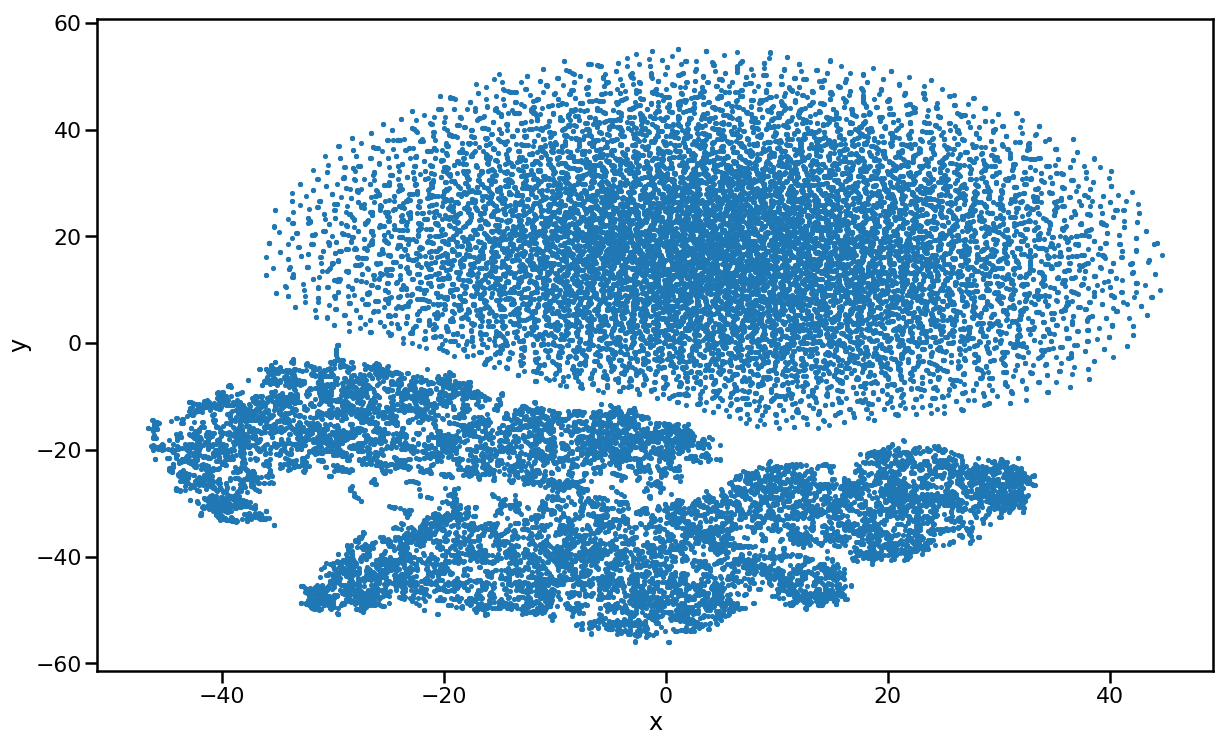

In [26]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [27]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

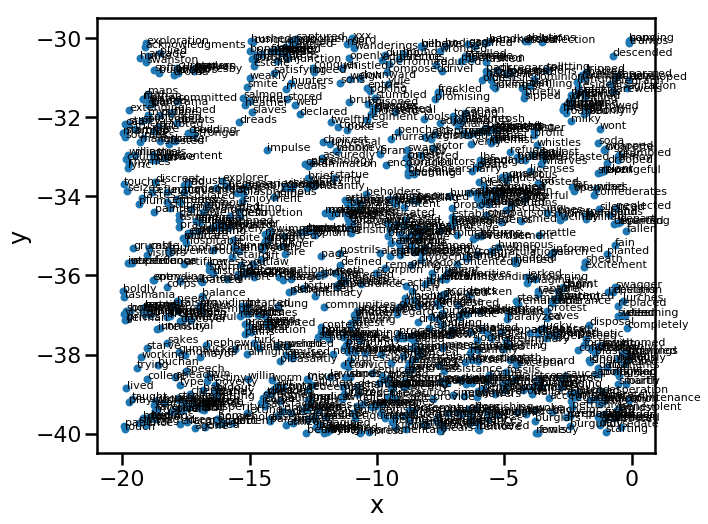

In [28]:
plot_region(x_bounds=(-20, 0), y_bounds=(-40, -30))

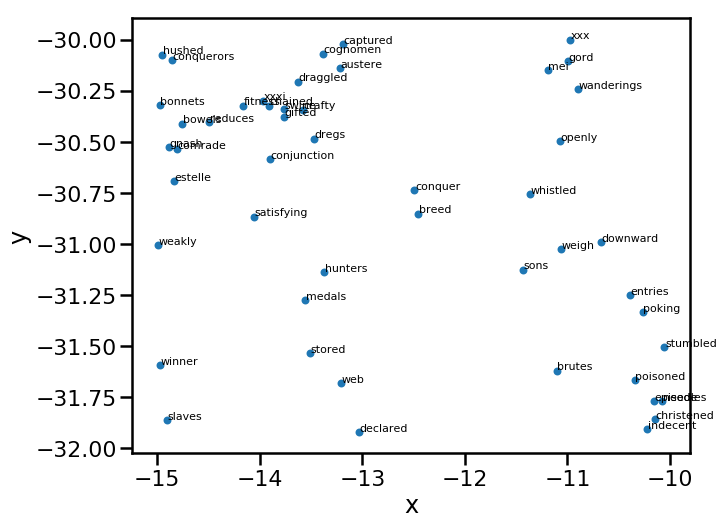

In [31]:
plot_region(x_bounds=(-15, -10), y_bounds=(-32, -30))

In [33]:
articles2vec.wv.most_similar("sydney")

[(u'melbourne', 0.8732747435569763),
 (u'bulletin', 0.8116230368614197),
 (u'grounds', 0.807168185710907),
 (u'hunting', 0.8030357956886292),
 (u'argus', 0.7991269826889038),
 (u'adelaide', 0.7974661588668823),
 (u'george', 0.7947894334793091),
 (u'city', 0.7941375970840454),
 (u'success', 0.7931573390960693),
 (u'shops', 0.7908243536949158)]

In [34]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = articles2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [35]:
nearest_similarity_cosmul("sydney",  "stories", "melbourne")

sydney is related to stories, as perception is related to melbourne


u'perception'

In [36]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
X = kmeans_model.fit(articles2vec.wv.vectors)
labels=kmeans_model.labels_.tolist()

In [37]:
l = kmeans_model.fit_predict(articles2vec.wv.vectors)
pca = PCA(n_components=2).fit(articles2vec.wv.vectors)
datapoint = pca.transform(articles2vec.wv.vectors)

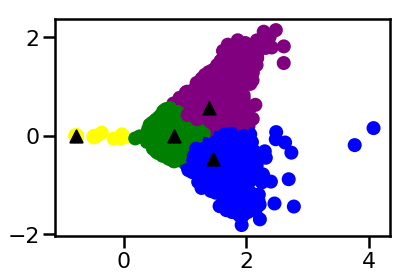

In [38]:
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [39]:
def visualize(model, output_path):
    meta_file = "w2x_metadata.tsv"
    placeholder = np.zeros((len(model.wv.index2word), 100))
    with open(os.path.join(output_path,meta_file), 'wb') as file_metadata:
        for i, word in enumerate(model.wv.index2word):
            placeholder[i] = model[word]
            # temporary solution for https://github.com/tensorflow/tensorflow/issues/9094
            if word == '':
                print("Emply Line, should replecaed by any thing else, or will cause a bug of tensorboard")
                file_metadata.write("{0}".format('<Empty Line>').encode('utf-8') + b'\n')
            else:
                file_metadata.write("{0}".format(word).encode('utf-8') + b'\n')
    # define the model without training
    sess = tf.InteractiveSession()
    embedding = tf.Variable(placeholder, trainable = False, name = 'w2x_metadata')
    tf.global_variables_initializer().run()
    saver = tf.train.Saver()
    writer = tf.summary.FileWriter(output_path, sess.graph)
    # adding into projector
    config = projector.ProjectorConfig()
    embed = config.embeddings.add()
    embed.tensor_name = 'w2x_metadata'
    embed.metadata_path = meta_file
    # Specify the width and height of a single thumbnail.
    projector.visualize_embeddings(writer, config)
    saver.save(sess, os.path.join(output_path,'w2x_metadata.ckpt'))
    print('Run `tensorboard --logdir={0}` to run visualize result on tensorboard'.format(output_path))

In [40]:
output_path="./CleanedText/"
model = articles2vec
visualize(model, output_path)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Run `tensorboard --logdir=./CleanedText/` to run visualize result on tensorboard


In [43]:
!tensorboard --logdir=output_path --host localhost --port 8088

/bin/sh: tensorboard: command not found
